# Using Gradient Descend to Find Coefficient of Quadratics

In [18]:
def eval_2nd_degree(coeffs, x):
    """
    Function to return the output of evaluating a second degree polynomial,
    given a specific x value.
    
    Args:
        coeffs: List containing the coefficients a,b, and c for the polynomial.
        x: The input x value to the polynomial.
    
    Returns:
        y: The corresponding output y value for the second degree polynomial.
    
    """
    a = (coeffs[0]*(x*x))
    b = coeffs[1]*x
    c = coeffs[2]
    y = a+b+c
    return y

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Getting random values for x in range(-10,10)
hundred_xs=np.random.uniform(-10,10,500)

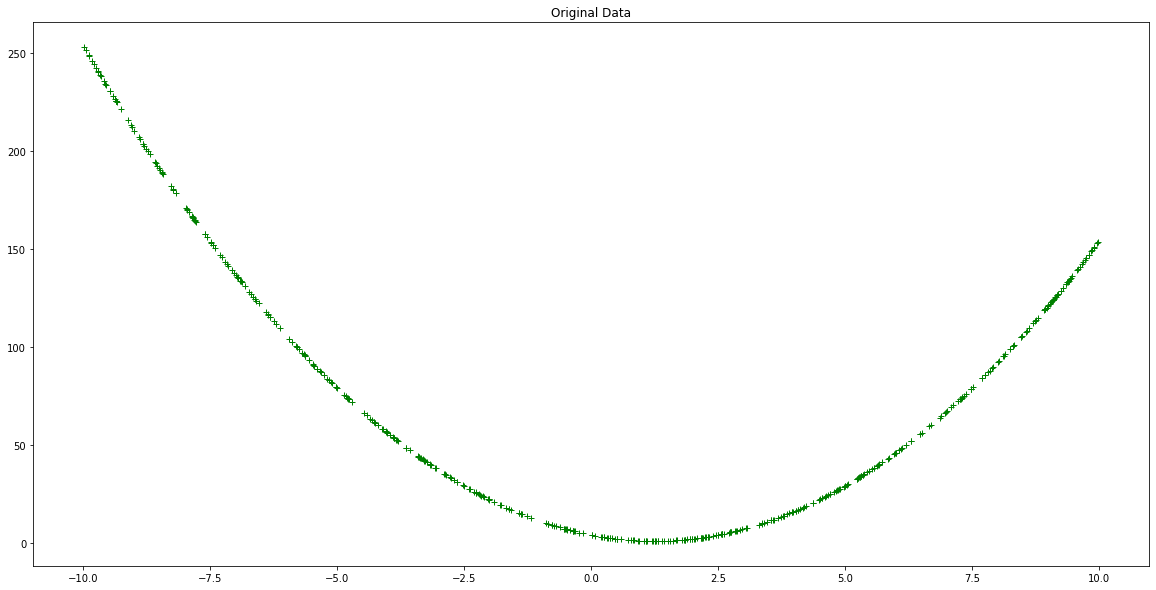

In [20]:
coeffs = [2, -5, 4] # Coefficient we CHOOSE for polynomial

x_y_pairs = [] # Getting the (x,y) pair
for x in hundred_xs:
    y  = eval_2nd_degree(coeffs, x) # Get y for input x
    x_y_pairs.append((x,y)) # Add pair to list
    
xs = [] # List for x values
ys = [] # List for y values
for a,b in x_y_pairs:
    xs.append(a) # Add to x list
    ys.append(b) # Add to y list
    
plt.figure(figsize=(20,10)) # Size of graph
plt.plot(xs, ys, 'g+') # Plot details
plt.title('Original Data') # title for graph
plt.show()

In [21]:
import random

def eval_2nd_degree_jitter(coeffs, x, j):
    """
    Function to return the noisy output of evaluating a second degree polynomial,
    given a specific x value. Output values can be within [y−j,y+j].
    
    Args:
        coeffs: List containing the coefficients a,b, and c for the polynomial.
        x: The input x value to the polynomial.
        j: Jitter parameter, to introduce noise to output y.
    
    Returns:
        y: The corresponding jittered output y value for the second degree polynomial.
    
    """
    a = (coeffs[0]*(x*x))
    b = coeffs[1]*x
    c = coeffs[2]
    y = a+b+c # Getting y value
    
    jit_val = random.random() * j + y  # Generate noise for y value
    
    return jit_val

In [22]:
(random.random()*120,random.random() * -120)

(6.454862977940077, -7.6074695284496485)

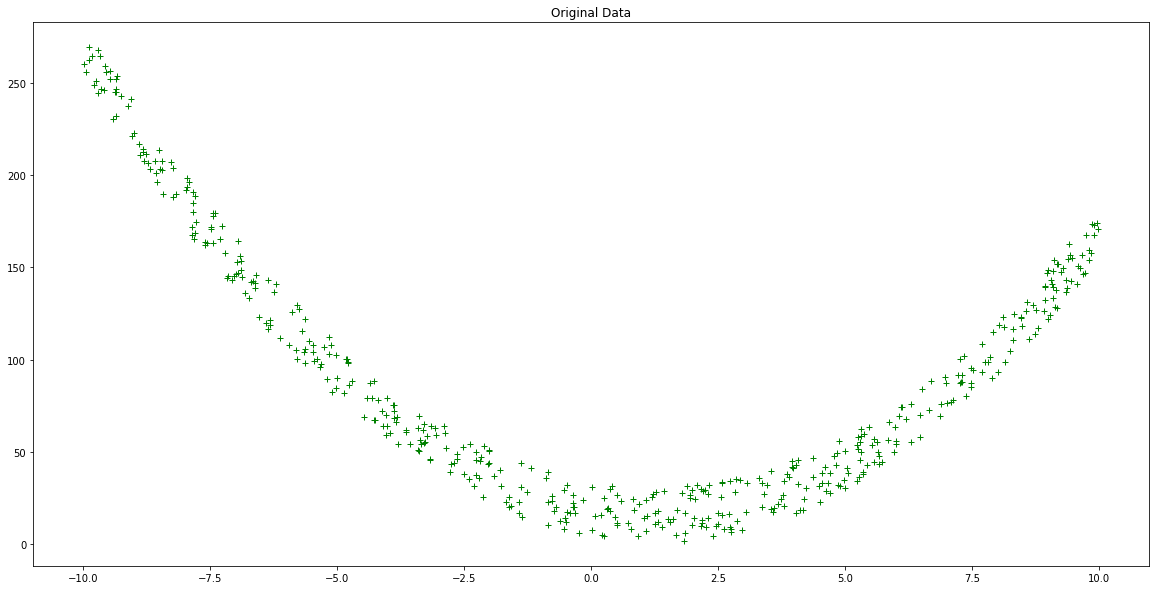

In [23]:
x_y_pairs = [] # List for x,y pair
j = 30 # Noise
for x in hundred_xs: # x in random sample list of xs
    y  = eval_2nd_degree_jitter(coeffs, x, j) # getting the y value of each x
    x_y_pairs.append((x,y)) # Append the pair
    
xs = [] # List for xs
ys = [] # List for ys
for a,b in x_y_pairs: 
    xs.append(a) # Append x to list
    ys.append(b) # Append y to list
    
plt.figure(figsize=(20,10)) # Plot size
plt.plot(xs, ys, 'g+') # Plot details
plt.title('Original Data') # Plot name
plt.show()

In [24]:
# Get random coefficients
rand_coeffs = (random.randrange(-10, 10), random.randrange(-10, 10), random.randrange(-10,10))
rand_coeffs

(-6, 9, 5)

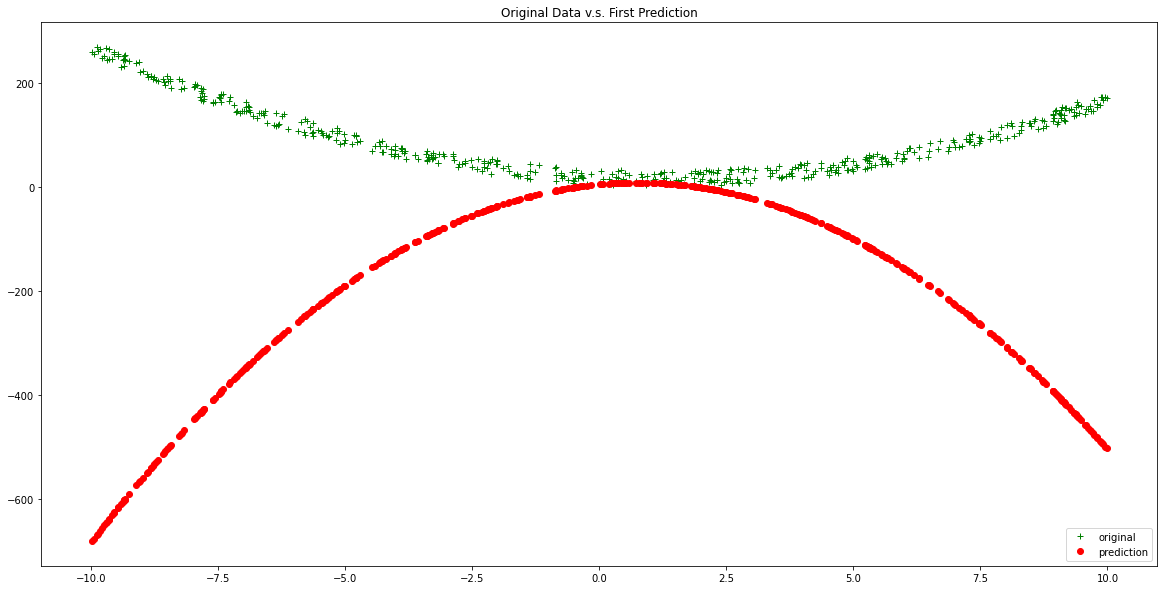

In [25]:
y_bar = eval_2nd_degree(rand_coeffs, hundred_xs) # Variable to hold all y values of xs

plt.figure(figsize=(20,10))
plt.plot(xs, ys, 'g+', label = 'original') # Plot of actual values (with the noise) (green +)
plt.plot(xs, y_bar, 'ro', label='prediction') # Plot of prediction (red circles)
plt.title('Original Data v.s. First Prediction') # Title of plot
plt.legend(loc="lower right") # Location of legend
plt.show()

In [26]:
def loss_mse(ys, y_bar):
    """
    Calculates Mean Squared Error (MSE) loss.
    
    Args:
        ys: training data labels
        y_bar: prediction labels
    
    Returns: Calculated MSE loss.
    """
    
    return sum( (ys-y_bar)**2) / len(ys)

initial_model_loss = loss_mse(ys, y_bar)
  
initial_model_loss

152358.2899598733

In [27]:
def calc_gradient_2nd_poly_for_GD(coeffs, inputs_x, outputs_y, lr): 
    """
    Calculates the gradient for a second degree polynomial.
    
    Args:
        coeffs: a,b and c, for a 2nd degree polynomial [ y = ax^2 + bx + c ]
        inputs_x: x input datapoints
        outputs_y: actual y output points
        lr: learning rate
        
    Returns: loss value, tuple of new coeffs, tuple of new predicted y values
    
    """
    a_s = []
    b_s = []
    c_s = []
        
    y_bars = eval_2nd_degree(coeffs, inputs_x) # Predicted y values

    for x,y,y_bar in list(zip(inputs_x, outputs_y, y_bars)): # Takes tuple of (input x, actual y, predicted y)
        
        x_squared = x**2 # Square x       
        
        partial_a = x_squared * (y - y_bar) # Sum part for gradient of coefficient a
        a_s.append(partial_a)
        
        partial_b = x * (y-y_bar) # Sum part for gradient of coefficient b
        b_s.append(partial_b)
        
        partial_c = (y-y_bar) # Sum part for gradient of coefficient c
        c_s.append(partial_c)
    
    n = len(y_bars) # Number of predicted y values
    
    gradient_a = (-2 / n) * sum(a_s) # Calculating gradient of a
    gradient_b = (-2 / n) * sum(b_s) # Calculating gradient of a
    gradient_c = (-2 / n) * sum(c_s) # Calculating gradient of a

    # Getting new coefficients from lr and gradient
    a_new = coeffs[0] - lr * gradient_a 
    b_new = coeffs[1] - lr * gradient_b
    c_new = coeffs[2] - lr * gradient_c
    
    new_model_coeffs = (a_new, b_new, c_new) # Variable for tuple of the new coefficients
    
    new_y_bar = eval_2nd_degree(new_model_coeffs, inputs_x) # Update predicted y with these new coeffs
    
    updated_model_loss = loss_mse(outputs_y, new_y_bar) # Variable for the Mean Squared Error loss value
    
    return updated_model_loss, new_model_coeffs, new_y_bar # Return loss value,
                                                           #        tuple of new coeffs,
                                                           #        tuple of new predicted y values

In [28]:
def gradient_descent(epochs, lr):
    """
    Perform gradient descent for a second degree polynomial.
    
    Args:
        epochs: number of iterations to perform of finding new coefficients and updatingt loss. 
        lr: specified learning rate
        
    Returns: Tuple containing (updated_model_loss, new_model_coeffs, new_y_bar predictions, saved loss updates)
    
    """
    losses = [] # List for holding the MSE losses (for a plot later)
    rand_coeffs_to_test = rand_coeffs # Variable to hold initial random coefficients
    for i in range(epochs): # num of iterations
        loss = calc_gradient_2nd_poly_for_GD(rand_coeffs_to_test, hundred_xs, ys, lr) # Variable for tuple holding 
                                                                                      # MSE loss value,
                                                                                      # tuple of new coeffs,
                                                                                      # tuple of new predicted y values
        rand_coeffs_to_test = loss[1] # Variable for tuple of new coeffs
        losses.append(loss[0]) # Append MSE loss value to losses list
    return loss[0], loss[1], loss[2], losses  # Return last iterations 
                                              # 1. MSE loss value
                                              # 2. tuple of new coeffs
                                              # 3. tuple of new predicted y values
                                              # AND the losses list

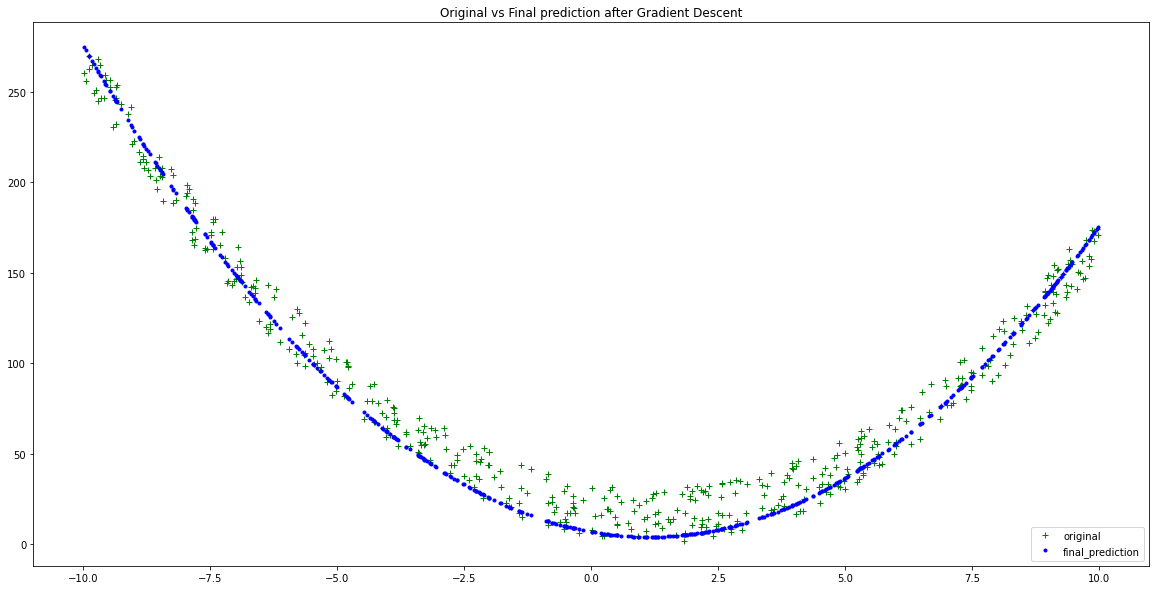

Final Coefficients predicted: (2.190152613944603, -5.005200529592068, 6.848175638723746)
Original Coefficients: [2, -5, 4]
MSE Loss: 140.58069729240003
Percentage of original error: 0.09227%.


In [29]:
GD = gradient_descent(1500, 0.0001)

plt.figure(figsize=(20,10)) # Plot size
plt.plot(xs, ys, 'g+', label = 'original') # Original y values
plt.plot(xs, GD[2], 'b.', label = 'final_prediction') # Predicted y values
plt.title('Original vs Final prediction after Gradient Descent') # Title
plt.legend(loc="lower right") # Location of legend
plt.show()

print(f"Final Coefficients predicted: {GD[1]}")
print(f"Original Coefficients: {coeffs}")
print(f"MSE Loss: {GD[0]}")
print(f"Percentage of original error: {round(GD[0]/initial_model_loss*100,5)}%.")

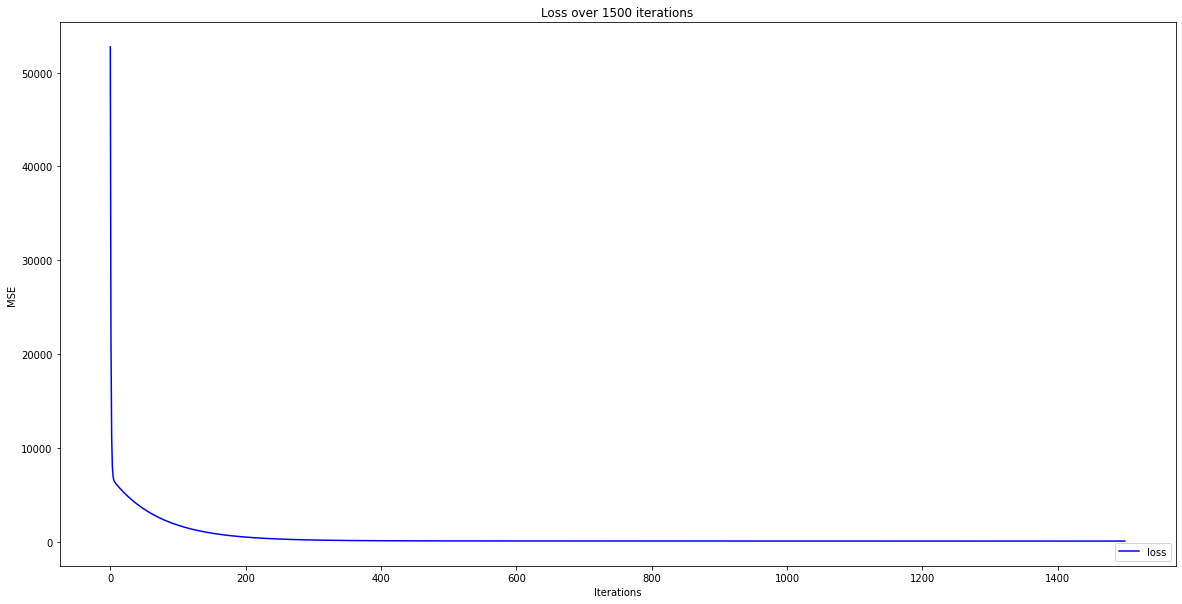

In [30]:
plt.figure(figsize=(20,10)) # Plot size
plt.plot(GD[3], 'b-', label = 'loss') # Plot of Mean Squared Error loss values
plt.title('Loss over 1500 iterations') # Title of plot
plt.legend(loc="lower right") # Location of legend
plt.xlabel('Iterations') # X label
plt.ylabel('MSE') # Y label
plt.show()